<a href="https://colab.research.google.com/github/ourwater5287/baekjoon-workspace/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load datasets

In [ ]:
# Load dataset file
data = pd.read_csv('kc_house_data.csv', usecols=['price', 'sqft_living'])
data

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


(17290, 1)
(17290, 1)


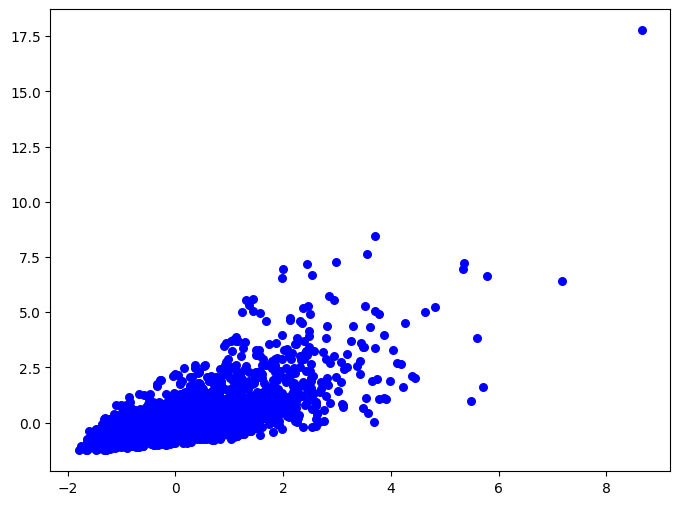

In [ ]:
# Numpy 배열로 전환
data_np = np.array(data)

x = data_np[:, 1]          # sqft_living
y = data_np[:, 0]          # price

# Dataset 정규화
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

x = (x-x_mean)/x_std
y = (y-y_mean)/y_std

# 2차원 행렬 변환
x = np.expand_dims(x, 1)
y = np.expand_dims(y, 1)

# Train dataset / Test dataset 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(x_train.shape)
print(y_train.shape)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.show()

## Least Square Method

- a 행렬과 똑같은 크기의 1로 채워진 행렬 생성:
  ```python
  arr = np.ones_like(a)
  ```
- 행렬 가로 쌓기:
  ```ptrhon
  arr = np.hstack([a, b])
  ```
- 행렬 곱:
  ```python
  arr = np.dot(a, b)
  ```
- 전치 행렬:
  ```python
  arr = a.T
  ```
- 역 행렬:
  ```python
  arr = np.linalg.inv(a)
  ```


- Goal:
$$\theta = (X^T \cdot X)^{-1} \cdot (X^T \cdot Y)$$


In [ ]:
def LSM(x, y):
  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)
  X = np.hstack([x,bias])

  # X transepose 생성
  X_T=X.T
  # X^T * X 생성
  X_T_X=np.dot(X_T, X)
  # (X^T * X)^-1 생성
  X_T_X_inv=np.linalg.inv(X_T_X)
  # X^T * Y 생성
  X_T_Y=np.dot(X_T, y)
  # theta 계산
  theta=np.dot(X_T_X_inv, X_T_Y)
  w=theta[0]
  b=theta[1]
  return w, b

In [ ]:
w, b = LSM(x_train, y_train)
print(w, b)

[0.70406843] [0.00267388]


## Prediction

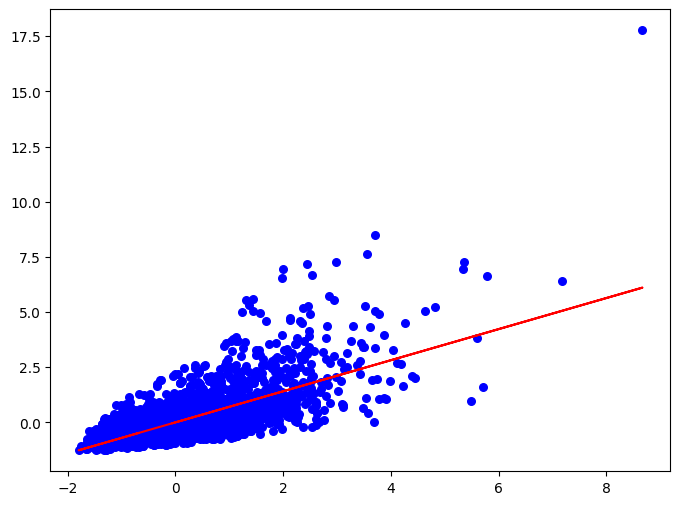

In [ ]:
# Test dataset을 이용한 예측
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r')
plt.show()

## Gradient Decent Method

- a 행렬과 똑같은 크기의 1로 채워진 행렬 생성:
  ```python
  arr = np.ones_like(a)
  ```
- 행렬 가로 쌓기:
  ```ptrhon
  arr = np.hstack([a, b])
  ```
- 행렬 곱:
  ```python
  arr = np.dot(a, b)
  ```
- 행렬 내 요소 합:
  ```python
  s = np.sum(a)
  ```

In [ ]:
def GDM(x, y):
  # 하이퍼 파라미터 설정
  learning_rate = 0.1
  n_iters = 100

  # w, b 초기값 설정
  w = 0
  b = 0

  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)
  X = np.hstack([x,bias])
  for i in range(n_iters):
    # [[w],
    #  [b]] 행렬 생성
    theta = np.array([w, b])
    theta = theta.reshape(2, 1)

    # y_hat 계산
    y_hat = np.dot(X, theta)

    # dw, db 계산
    # dw = 2/N * sum(y - y_hat) * -X (* bias 열 없는 X)
    # db = 2/N * sum(y - y_hat) * -1
    dw = 2/len(X) * np.sum(y - y_hat) * -X[:, 0]
    db = 2/len(X) * np.sum(y - y_hat) * -1


    # w, b 업데이트
    # w_t+1 = w_t - learning rate * dw
    # b_t+1 = b_t - learning rate * db
    w = w - learning_rate * dw
    b = b - learning_rate * db

  return w, b

In [ ]:
w, b = GDM(x_train, y_train)
print(w, b)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

## Prediction

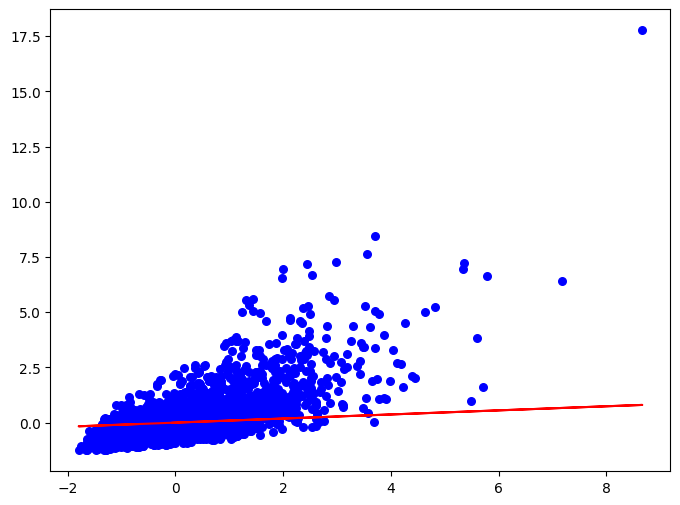

In [ ]:
# Test dataset을 이용한 예측
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r')
plt.show()